In [1]:
import pandas as pd
import numpy as np
from scipy import stats
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from mpl_toolkits.mplot3d import Axes3D

In [2]:
ddi_mapping = pd.read_pickle('../../Data/New/Interactions/Drugs/ddi_mapping_grp.pickle')
data = ddi_mapping
data.drop(['SUBJECT_IDS'], axis=1, inplace=True)
columns = ['NO_OF_SUBJECTS', 'GRP_1', 'GRP_2', 'GRP_3', 'GRP_4', 'GRP_5', 'GRP_6', 'GRP_7']

In [5]:
x = data.drop(['OPIOIDS', 'OTHER_DRUGS'], axis=1)
x = x.values
#x.fillna(0, inplace=True)
#print(x.isnull().sum())
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
data_normalized = pd.DataFrame(x_scaled)
data_normalized.columns=columns
#data_normalized.drop(["SUBJECT_ID","AGE_GROUP"], axis=1, inplace=True)
#subject_details_normalized["AGE_GROUP"] = subject_details["AGE_GROUP"].values
#subject_details_normalized["SUBJECT_ID"] = subject_details["SUBJECT_ID"].values
data_normalized.head()
data_normalized['OPIOIDS'] = data['OPIOIDS']
data_normalized['OTHER_DRUGS'] = data['OTHER_DRUGS']
data_normalized.head()

/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


,NO_OF_SUBJECTS,GRP_1,GRP_2,GRP_3,GRP_4,GRP_5,GRP_6,GRP_7,OPIOIDS,OTHER_DRUGS
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,oxymorphone,neo*po*prednisolone syrup
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,oxymorphone,levetiracetam oral solution
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,oxymorphone,d12w
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,oxymorphone,remifentanil
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,oxymorphone,ceftriaxone


In [6]:
opioids = ['OXYMORPHONE', 'OXYCODONE', 'MORPHINE', 'MEPERIDINE','HYDROMORPHONE', 'HYDROCODONE', 'FENTANYL', 
           'CODEINE', 'BUPRENORPHINE','METHADONE', 'NALOXONE']
opioids = [x.lower() for x in opioids]
opioids

['oxymorphone',
 'oxycodone',
 'morphine',
 'meperidine',
 'hydromorphone',
 'hydrocodone',
 'fentanyl',
 'codeine',
 'buprenorphine',
 'methadone',
 'naloxone']

In [7]:
#with open('../Data/Opioids/Model_Data/subject_details_age.pickle', 'rb') as pickler:
    #subject_details_age = pickle.load(pickler)
#with open('../Data/Opioids/Interactions/Drugs/opioid_subject_drugs_freq_dict_ord.pickle', 'rb') as pickler:
opioid_subject_drugs_freq_dict_ord = pd.read_pickle('../../Data/Opioids/Interactions/Drugs/opioid_subject_drugs_freq_dict_ord.pickle')

In [8]:
opioid_subject_other_drugs = dict()
for drug in opioid_subject_drugs_freq_dict_ord.keys():
    if ((drug.contains('oxymorphone') or drug.contains('oxycodone') or drug.contains('morphine') or
        drug.contains('meperidine') or drug.contains('hydromorphone') or drug.contains('hydrocodone') or
        drug.contains('fentanyl') or drug.contains('codeine') or drug.contains('buprenorphine') or 
        drug.contains('naloxone') or drug.contains('methadone'))):
        print(drug)

AttributeError: 'str' object has no attribute 'contains'

In [9]:
opioid_subject_other_drugs_feq = dict()
opioid_subject_opioids_freq = dict()
for drug in opioid_subject_drugs_freq_dict_ord.keys():
    if (('oxymorphone' not in drug and 'oxycodone' not in drug and 'morphine' not in drug and
        'meperidine' not in drug and 'hydromorphone' not in drug and 'hydrocodone' not in drug and
        'fentanyl' not in drug and 'codeine' not in drug and 'buprenorphine' not in drug and
        'naloxone' not in drug and 'methadone' not in drug)):
        opioid_subject_other_drugs[drug] = opioid_subject_drugs_freq_dict_ord[drug]
    else:
        opioid_subject_opioids_freq[drug] = opioid_subject_drugs_freq_dict_ord[drug]

In [10]:
len(opioid_subject_other_drugs)

3710

In [11]:
other_drugs_indices = enumerate(opioid_subject_other_drugs.keys(), 12)
other_drugs_dict = dict()
for index, drug in other_drugs_indices:
    other_drugs_dict[drug] = index
    print(index, drug)

opioids_indices = enumerate(opioids, 1)
opioid_dict = dict()
for index, opioid in opioids_indices:
    opioid_dict[opioid] = index
    print(index, opioid)

12 potassium chloride
13 d5w
14 insulin
15 furosemide
16 ns
17 0.9% sodium chloride
18 magnesium sulfate
19 iso-osmotic dextrose
20 sodium chloride 0.9%  flush
21 acetaminophen
22 5% dextrose
23 metoprolol
24 sw
25 metoprolol tartrate
26 lorazepam
27 calcium gluconate
28 heparin
29 docusate sodium
30 vancomycin
31 bisacodyl
32 warfarin
33 heparin sodium
34 lr
35 propofol
36 pantoprazole
37 senna
38 aspirin
39 bag
40 vial
41 vancomycin hcl
42 dextrose 50%
43 albuterol 0.083% neb soln
44 ondansetron
45 ranitidine
46 haloperidol
47 levofloxacin
48 aspirin ec
49 sodium bicarbonate
50 prednisone
51 ipratropium bromide neb
52 famotidine
53 potassium phosphate
54 nitroglycerin
55 pantoprazole sodium
56 lisinopril
57 metoclopramide
58 neutra-phos
59 atorvastatin
60 amiodarone
61 hydralazine
62 diltiazem
63 docusate sodium (liquid)
64 d5 1/2ns
65 phenylephrine
66 sterile water
67 midazolam
68 0.9% sodium chloride (mini bag plus)
69 syringe
70 cefazolin
71 amiodarone hcl
72 milk of magnesia
73 t

719 lidocaine 1%/epinephrine 1:100000
720 dicloxacillin
721 docusate
722 creon 12
723 olanzapine (disintergrating tablet)
724 butalbital-acet-caffeine
725 vitamin e
726 beclomethasone dipro. aq (nasal)
727 clonidine tts 3 patch
728 neo*im*pneumococcal 7-valent
729 salmeterol
730 felodipine
731 nitrofurantoin (macrodantin)
732 neo*im*haemophilus b  conj vac
733 colistin
734 clobetasol propionate 0.05% cream
735 mesna
736 ns syringe (intrapleural)
737 d15w
738 lyrica
739 *nf* basiliximab
740 heparin flush port (10 units/ml)
741 fluphenazine
742 ropinirole hcl
743 norepinephrine bitartrate
744 bicitra
745 flecainide acetate
746 doxorubicin
747 beclomethasone dipropionate
748 desmopressin nasal
749 drotrecogin alfa (xigris)
750 d12.5w
751 hydrocortisone (rectal) 2.5% cream
752 avapro
753 perphenazine
754 multivitamin-12
755 bismuth subsalicylate
756 meningococcal conj vaccine (menactra)
757 vitamin b complex w/c
758 tirofiban
759 sterile diluent for flolan
760 tocopheryl
761 epoprostenol n

1219 salsalate
1220 phenylephrine 2.5 % ophth soln
1221 theophylline (slo-bid) capsule
1222 simvastatin or placebo
1223 methylene blue
1224 rivastigmine
1225 pancrease mt 16
1226 lopinavir-ritonavir (oral soln)
1227 0.9% sodium chloride (excel bag)
1228 calcium carbonate (tums)
1229 levobunolol hcl 0.5%
1230 hydrocortisone oint 1%
1231 tetracycline hcl
1232 loxapine succinate
1233 doripenem *nf*
1234 atacand
1235 ranexa
1236 travatan z
1237 gentamicin sulf. ophth. soln
1238 naphazoline-pheniramine ophth. solution
1239 sodium bica
1240 paclitaxel
1241 vancomycin 25mg/ml ophth soln
1242 dextroamphetamine
1243 vancomycin intrathecal
1244 bactrim desensitization
1245 fenofibrate micronized
1246 copaxone
1247 critic-aid skin paste
1248 basiliximab
1249 theophylline er (uniphyl)
1250 ketoconazole
1251 welchol
1252 cromolyn sodium
1253 levemir
1254 piroxicam
1255 pancuronium bromide (nicu)
1256 symbicort
1257 levalbuterol tartrate
1258 nalbuphine hcl
1259 zelnorm
1260 tretinoin suspension
126

1718 concerta
1719 neo*po*ursodiol
1720 imatinib oral suspension
1721 neomycin/polymyxin/dexameth ophth susp.
1722 analgesic balm
1723 albendazole
1724 lithium carbonate sr
1725 lidocaine 1% 
1726 sutent
1727 mycophenolate mofetil (self med)
1728 cetirizine
1729 nystatin-triamcinolone ointment
1730 maprotiline hcl
1731 blistex lip ointment
1732 profilnine sd
1733 amikacin inhalation
1734 trifluridine 1% ophth soln.
1735 balanced salt opth. soln
1736 thera
1737 imatinib
1738 dexamethasone oral soln (0.1mg/1ml)
1739 humalog mix 75-25
1740 revatio
1741 propantheline bromide
1742 agrylin
1743 sodium bi
1744 zebeta
1745 rilutek
1746 proair hfa
1747 praziquantel
1748 sodiu
1749 humulin n
1750 estraderm
1751 cromolyn
1752 gentamicin intraventricular
1753 valproic
1754 procardia xl
1755 lubiprostone
1756 clofarabine
1757 aztreonam  desensitization 
1758 docusate sodi
1759 regular insulin
1760 triaz
1761 docusa
1762 flutamide
1763 sulfasalazine ec
1764 clotrimazole 1% vaginal cream
1765 neo*po*

2218 insulin lispro 75/25
2219 aspiri
2220 sonata
2221 calcium
2222 risedronate sodium
2223 atenolol-chlorthalidone
2224 clobetasol propionate 0.05% gel
2225 insulin - sliding scale
2226 calcipotriene 0.005% oint
2227 revlimid
2228 kayexalate
2229 as
2230 nitrofurantoin macrocrystal
2231 bupivacaine 0.75%
2232 exjade
2233 pregabalin oral solution
2234 quetiapine oral suspension
2235 cefazolin ophthalmic solution
2236 peppermint 
2237 prednisone (self med)
2238 donepezil 5 mg or placebo
2239 trientine hcl
2240 varicella zoster immune glob
2241 prevacid
2242 romiplostim
2243 l-hyoscyamine sl
2244 alb
2245 gentamicin 0.1% cream
2246 aspirin 325 mg or placebo
2247 albu
2248 paromomycin
2249 carrington dermal wound
2250 octagam
2251 roflumilast
2252 alum-mag hydroxide-simethicone
2253 clonidine tts
2254 geodon
2255 advicor
2256 hepa
2257 pramoxine
2258 *nf* niacin
2259 valpr
2260 triazol
2261 lithium oral solution
2262 requip
2263 daunorubicin citrate liposomal
2264 neo*po*nystatin suspensi

2718 bisaco
2719 bottle, glass
2720 ocuflox
2721 eplerenone (inspra)
2722 lipitor
2723 novolin r
2724 mometasone furoate (nasonex)
2725 isosorbide monon
2726 sulfameth/trimethopr
2727 tuck
2728 neo*po*gentian violet 0.25 %
2729 tylenol pm extra strength
2730 alka-seltzer
2731 sarna
2732 microgestin 1/20 (21)
2733 lidocaine topical
2734 phenylephrine  0.05% nasal spray
2735 *nf*
2736 amiodarone oral suspension
2737 benazepril-hydrochlorothiazide
2738 chloroprocaine 3% mpf
2739 hydrocortisone/iodoquinol
2740 fentora
2741 ocuvite lutein
2742 plan b(levonorgestrel)
2743 reyataz
2744 abiraterone (zytiga)
2745 fluocinolone 0.01% cream
2746 azelastine hcl
2747 niacin flush free
2748 salivart
2749 albuterol inhaler (proair)
2750 pramoxine-mineral oil-zinc
2751 iron
2752 tobramycin fortified ophth. 15mg/ml
2753 pramoxine hcl
2754 isosorbide mononitrate 
2755 nuvaring(etonogestrel/ethinyl estradiol
2756 ethanol 70% catheter lock
2757 lantus solostar
2758 dakins 1/8 strength
2759 abreva
2760 acid

3218 balsalazide disodium
3219 menest (esterified estrogens)
3220 chlorzoxazone
3221 rozerem (ramelteon)
3222 theophylline (time release)
3223 *nf* ivermectin
3224 junel 1.5/30 (21)
3225 amoxicillin-clavulanate susp
3226 lactate based cvvh solution
3227 hyoscyamine 
3228 diphenhydramine hcl 2%
3229 mylanta
3230 sevelamer 
3231 carnitor
3232 desogestrel-ethinyl estradiol
3233 avodart *nf* (dutasteride)
3234 yaz 28
3235 calcipotriene
3236 demeclocycline hcl
3237 xenical
3238 mesalami
3239 megest
3240 ceftaroline
3241 methylph
3242 sunol-ch36 study drug (*ind*)
3243 ranitidine 
3244 2
3245 propof
3246 etodolac
3247 concerta 
3248 vemurafenib (ro5185426)
3249 btl
3250 magnesium oxide-mg aa chelate
3251 darbopoetin (aranesp)
3252 erythromycin opthalmic
3253 temsirolimus
3254 zelboraf
3255 guaifenesin dm table
3256 sulfameth/trim
3257 mepe
3258 nefazodon
3259 dextromethorphan-guaifenesin 
3260 calcium lactate
3261 nafcillin sodium
3262 glycerin (laxative)
3263 chromium picolinate
3264 glipiz

3717 lacri-lube
3718 capt
3719 white petrolatum-mineral oil
3720 artificial tear
3721 warf
1 oxymorphone
2 oxycodone
3 morphine
4 meperidine
5 hydromorphone
6 hydrocodone
7 fentanyl
8 codeine
9 buprenorphine
10 methadone
11 naloxone


In [12]:
opioid_dict

{'buprenorphine': 9,
 'codeine': 8,
 'fentanyl': 7,
 'hydrocodone': 6,
 'hydromorphone': 5,
 'meperidine': 4,
 'methadone': 10,
 'morphine': 3,
 'naloxone': 11,
 'oxycodone': 2,
 'oxymorphone': 1}

In [13]:
for index, row in data_normalized.iterrows():
    row['OPIOIDS'] = opioid_dict[row['OPIOIDS']]
    row['OTHER_DRUGS'] = other_drugs_dict[row['OTHER_DRUGS']]
    data_normalized.iloc[index] = row
    if (index%100 == 0):
        print("Rows iterated: %i" %index)
data_normalized.head()

Rows iterated: 0
Rows iterated: 100
Rows iterated: 200
Rows iterated: 300
Rows iterated: 400
Rows iterated: 500
Rows iterated: 600
Rows iterated: 700
Rows iterated: 800
Rows iterated: 900
Rows iterated: 1000
Rows iterated: 1100
Rows iterated: 1200
Rows iterated: 1300
Rows iterated: 1400
Rows iterated: 1500
Rows iterated: 1600
Rows iterated: 1700
Rows iterated: 1800
Rows iterated: 1900
Rows iterated: 2000
Rows iterated: 2100
Rows iterated: 2200
Rows iterated: 2300
Rows iterated: 2400
Rows iterated: 2500
Rows iterated: 2600
Rows iterated: 2700
Rows iterated: 2800
Rows iterated: 2900
Rows iterated: 3000
Rows iterated: 3100
Rows iterated: 3200
Rows iterated: 3300
Rows iterated: 3400
Rows iterated: 3500
Rows iterated: 3600
Rows iterated: 3700
Rows iterated: 3800
Rows iterated: 3900
Rows iterated: 4000
Rows iterated: 4100
Rows iterated: 4200
Rows iterated: 4300
Rows iterated: 4400
Rows iterated: 4500
Rows iterated: 4600
Rows iterated: 4700
Rows iterated: 4800
Rows iterated: 4900
Rows iterate

Rows iterated: 39600
Rows iterated: 39700
Rows iterated: 39800
Rows iterated: 39900
Rows iterated: 40000
Rows iterated: 40100
Rows iterated: 40200
Rows iterated: 40300
Rows iterated: 40400
Rows iterated: 40500
Rows iterated: 40600
Rows iterated: 40700
Rows iterated: 40800


,NO_OF_SUBJECTS,GRP_1,GRP_2,GRP_3,GRP_4,GRP_5,GRP_6,GRP_7,OPIOIDS,OTHER_DRUGS
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,3014
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,612
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,2178
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,3697
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,110


In [46]:
data.columns

Index(['OPIOIDS', 'OTHER_DRUGS', 'NO_OF_SUBJECTS', 'GRP_1', 'GRP_2', 'GRP_3',
       'GRP_4', 'GRP_5', 'GRP_6', 'GRP_7', 'CLUSTERS'],
      dtype='object')

In [78]:
#Cluster the data
kmeans = KMeans(n_clusters=4, random_state=0).fit(data_normalized)
labels = kmeans.labels_

#Glue back to originaal data
data['CLUSTERS'] = labels
data_normalized['CLUSTERS'] = labels
#Add the column into our list
all_columns = ['OPIOIDS', 'OTHER_DRUGS', 'NO_OF_SUBJECTS', 'GRP_1', 'GRP_2', 'GRP_3',
       'GRP_4', 'GRP_5', 'GRP_6', 'GRP_7', 'CLUSTERS']
all_columns.extend(['CLUSTERS'])

#Lets analyze the clusters
#print(data[all_columns].groupby(['CLUSTERS']).mean())

In [79]:
set(data['CLUSTERS'])

{0, 1, 2, 3}

Text(0.5,21.7063,'Other Drugs')

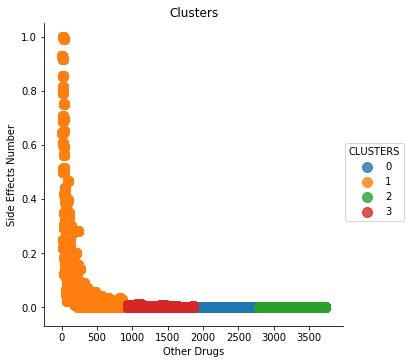

In [144]:
#Scatter plot of Wattage and Duration
data_2 = data_normalized[data_normalized['CLUSTERS']==2]
sns.lmplot('OTHER_DRUGS', 'GRP_1',
           data=data_normalized, 
           fit_reg=False, 
           hue="CLUSTERS",  
           scatter_kws={"marker": "D", 
                        "s": 100})
plt.title('Clusters')
plt.ylabel('Side Effects Number')
plt.xlabel('Other Drugs')

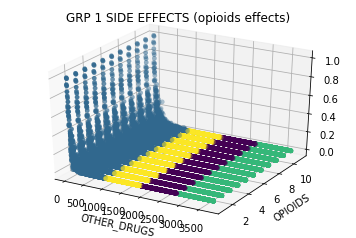

In [108]:
fig = plt.figure()
ax = fig.gca(projection='3d')
#ax.plot_trisurf(data_normalized['OTHER_DRUGS'], data_normalized['OPIOIDS'], 
 #               data_normalized['GRP_1'], cmap=plt.cm.viridis, linewidth=0.2)
ax.scatter3D(data_normalized['OTHER_DRUGS'], data_normalized['OPIOIDS'], 
                data_normalized['GRP_1'], c=data_normalized['CLUSTERS'], linewidth=0.2, label=data_normalized['CLUSTERS'])
plt.ylabel('OPIOIDS')
plt.xlabel('OTHER_DRUGS')
plt.title('GRP 1 SIDE EFFECTS (opioids effects)')
#plt.legend()
plt.gca()


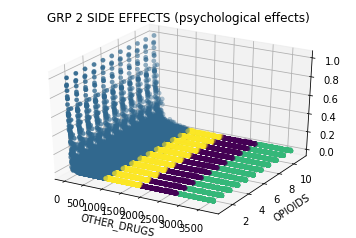

In [98]:
fig = plt.figure()
ax = fig.gca(projection='3d')
#ax.plot_trisurf(data_normalized['OTHER_DRUGS'], data_normalized['OPIOIDS'], 
 #               data_normalized['GRP_1'], cmap=plt.cm.viridis, linewidth=0.2)
ax.scatter3D(data_normalized['OTHER_DRUGS'], data_normalized['OPIOIDS'], 
                data_normalized['GRP_2'], c=data_normalized['CLUSTERS'], linewidth=0.2)
plt.ylabel('OPIOIDS')
plt.xlabel('OTHER_DRUGS')
plt.title('GRP 2 SIDE EFFECTS (psychological effects)')
plt.gca()


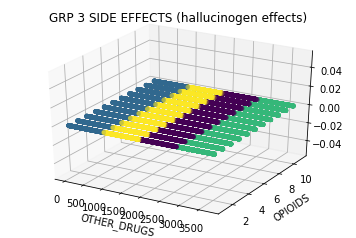

In [99]:
fig = plt.figure()
ax = fig.gca(projection='3d')
#ax.plot_trisurf(data_normalized['OTHER_DRUGS'], data_normalized['OPIOIDS'], 
 #               data_normalized['GRP_1'], cmap=plt.cm.viridis, linewidth=0.2)
ax.scatter3D(data_normalized['OTHER_DRUGS'], data_normalized['OPIOIDS'], 
                data_normalized['GRP_3'], c=data_normalized['CLUSTERS'], linewidth=0.2)
plt.ylabel('OPIOIDS')
plt.xlabel('OTHER_DRUGS')
plt.title('GRP 3 SIDE EFFECTS (hallucinogen effects)')
plt.gca()


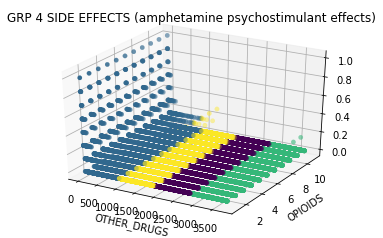

In [100]:
fig = plt.figure()
ax = fig.gca(projection='3d')
#ax.plot_trisurf(data_normalized['OTHER_DRUGS'], data_normalized['OPIOIDS'], 
 #               data_normalized['GRP_1'], cmap=plt.cm.viridis, linewidth=0.2)
ax.scatter3D(data_normalized['OTHER_DRUGS'], data_normalized['OPIOIDS'], 
                data_normalized['GRP_4'], c=data_normalized['CLUSTERS'], linewidth=0.2)
plt.ylabel('OPIOIDS')
plt.xlabel('OTHER_DRUGS')
plt.title('GRP 4 SIDE EFFECTS (amphetamine psychostimulant effects)')
plt.gca()

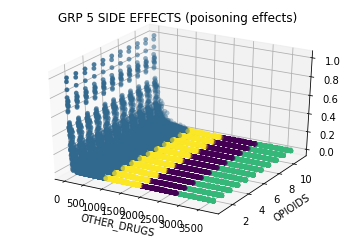

In [101]:
fig = plt.figure()
ax = fig.gca(projection='3d')
#ax.plot_trisurf(data_normalized['OTHER_DRUGS'], data_normalized['OPIOIDS'], 
 #               data_normalized['GRP_1'], cmap=plt.cm.viridis, linewidth=0.2)
ax.scatter3D(data_normalized['OTHER_DRUGS'], data_normalized['OPIOIDS'], 
                data_normalized['GRP_5'], c=data_normalized['CLUSTERS'], linewidth=0.2)
plt.ylabel('OPIOIDS')
plt.xlabel('OTHER_DRUGS')
plt.title('GRP 5 SIDE EFFECTS (poisoning effects)')
plt.gca()

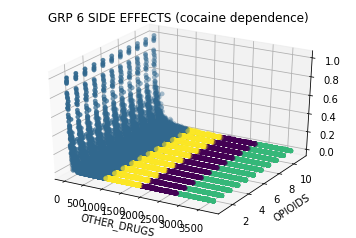

In [102]:
fig = plt.figure()
ax = fig.gca(projection='3d')
#ax.plot_trisurf(data_normalized['OTHER_DRUGS'], data_normalized['OPIOIDS'], 
 #               data_normalized['GRP_1'], cmap=plt.cm.viridis, linewidth=0.2)
ax.scatter3D(data_normalized['OTHER_DRUGS'], data_normalized['OPIOIDS'], 
                data_normalized['GRP_6'], c=data_normalized['CLUSTERS'], linewidth=0.2)
plt.ylabel('OPIOIDS')
plt.xlabel('OTHER_DRUGS')
plt.title('GRP 6 SIDE EFFECTS (cocaine dependence)')
plt.gca()

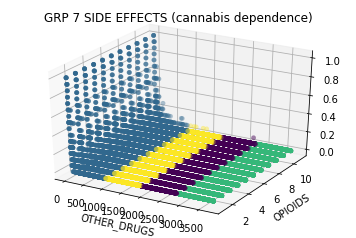

In [103]:
fig = plt.figure()
ax = fig.gca(projection='3d')
#ax.plot_trisurf(data_normalized['OTHER_DRUGS'], data_normalized['OPIOIDS'], 
 #               data_normalized['GRP_1'], cmap=plt.cm.viridis, linewidth=0.2)
ax.scatter3D(data_normalized['OTHER_DRUGS'], data_normalized['OPIOIDS'], 
                data_normalized['GRP_7'], c=data_normalized['CLUSTERS'], linewidth=0.2)
plt.ylabel('OPIOIDS')
plt.xlabel('OTHER_DRUGS')
plt.title('GRP 7 SIDE EFFECTS (cannabis dependence)')
plt.gca()

In [129]:
new_data = data[(data['CLUSTERS']==1) & (data['OTHER_DRUGS']=='zonisamide')] #.groupby('OPIOIDS').max()
new_data

,OPIOIDS,OTHER_DRUGS,NO_OF_SUBJECTS,GRP_1,GRP_2,GRP_3,GRP_4,GRP_5,GRP_6,GRP_7,CLUSTERS
3174,oxymorphone,zonisamide,72,3,1,0,0,0,0,0,1
6884,oxycodone,zonisamide,72,3,1,0,0,0,0,0,1
10594,morphine,zonisamide,72,3,1,0,0,0,0,0,1
14304,meperidine,zonisamide,72,3,1,0,0,0,0,0,1
18014,hydromorphone,zonisamide,72,3,1,0,0,0,0,0,1
21724,hydrocodone,zonisamide,72,3,1,0,0,0,0,0,1
25434,fentanyl,zonisamide,72,3,1,0,0,0,0,0,1
29144,codeine,zonisamide,72,3,1,0,0,0,0,0,1
32854,buprenorphine,zonisamide,72,3,1,0,0,0,0,0,1
36564,methadone,zonisamide,72,3,1,0,0,0,0,0,1


In [140]:
new_data = data[(data['OTHER_DRUGS']=='fludrocortisone acetate')] #.groupby('OPIOIDS').max()
new_data

,OPIOIDS,OTHER_DRUGS,NO_OF_SUBJECTS,GRP_1,GRP_2,GRP_3,GRP_4,GRP_5,GRP_6,GRP_7,CLUSTERS
15,oxymorphone,fludrocortisone acetate,751,33,3,0,0,3,4,0,1
3725,oxycodone,fludrocortisone acetate,751,33,3,0,0,3,4,0,1
7435,morphine,fludrocortisone acetate,751,33,3,0,0,3,4,0,1
11145,meperidine,fludrocortisone acetate,751,33,3,0,0,3,4,0,1
14855,hydromorphone,fludrocortisone acetate,751,33,3,0,0,3,4,0,1
18565,hydrocodone,fludrocortisone acetate,751,33,3,0,0,3,4,0,1
22275,fentanyl,fludrocortisone acetate,751,33,3,0,0,3,4,0,1
25985,codeine,fludrocortisone acetate,751,33,3,0,0,3,4,0,1
29695,buprenorphine,fludrocortisone acetate,751,33,3,0,0,3,4,0,1
33405,methadone,fludrocortisone acetate,751,33,3,0,0,3,4,0,1


In [142]:
ddi_mapping = pd.read_pickle('../../Data/Opioids/Interactions/Drugs/ddi_mapping_grp.pickle')
ddi_mapping.head()

,OPIOIDS,OTHER_DRUGS,NO_OF_SUBJECTS,SUBJECT_IDS,GRP_1,GRP_2,GRP_3,GRP_4,GRP_5,GRP_6,GRP_7
0,oxymorphone,nyst,2,"{60805, 76709}",0,0,0,0,0,0,0
1,oxymorphone,excedrin extra strength,1,{31221},0,0,0,0,0,0,0
2,oxymorphone,cilostazol,37,"{63616, 79873, 21893, 27398, 14611, 95637, 288...",0,0,0,0,0,0,0
3,oxymorphone,tolnaftate 1% cream,2,"{12412, 2628}",0,0,0,0,0,0,0
4,oxymorphone,syringe (intraventricular),15,"{89026, 23523, 98276, 32229, 44514, 30018, 746...",0,0,0,0,0,0,0


In [143]:
ddi_mapping[ddi_mapping['OTHER_DRUGS'] == 'nyst']

,OPIOIDS,OTHER_DRUGS,NO_OF_SUBJECTS,SUBJECT_IDS,GRP_1,GRP_2,GRP_3,GRP_4,GRP_5,GRP_6,GRP_7
0,oxymorphone,nyst,2,"{60805, 76709}",0,0,0,0,0,0,0
3710,oxycodone,nyst,2,"{60805, 76709}",0,0,0,0,0,0,0
7420,morphine,nyst,2,"{60805, 76709}",0,0,0,0,0,0,0
11130,meperidine,nyst,2,"{60805, 76709}",0,0,0,0,0,0,0
14840,hydromorphone,nyst,2,"{60805, 76709}",0,0,0,0,0,0,0
18550,hydrocodone,nyst,2,"{60805, 76709}",0,0,0,0,0,0,0
22260,fentanyl,nyst,2,"{60805, 76709}",0,0,0,0,0,0,0
25970,codeine,nyst,2,"{60805, 76709}",0,0,0,0,0,0,0
29680,buprenorphine,nyst,2,"{60805, 76709}",0,0,0,0,0,0,0
33390,methadone,nyst,2,"{60805, 76709}",0,0,0,0,0,0,0
